# E-commerce project

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Чтение файлов и разведочный анализ

#### Данные о покупателях

In [2]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Проверка типов данных для принятия решения о их сохранении и проверка наличия пустых значений
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


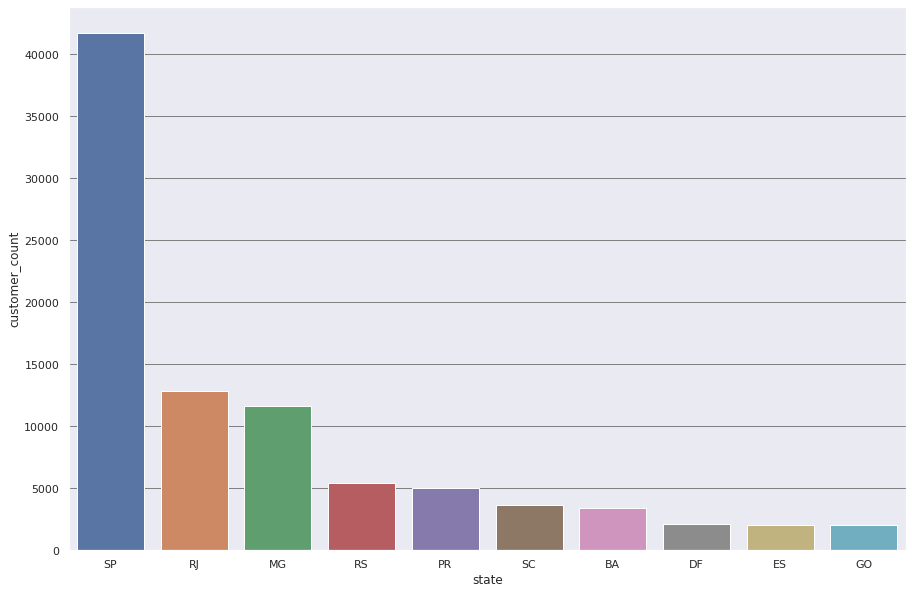

In [84]:
# Просмотр топ 10 стран по количеству покупателей
top_states = customers.customer_state.value_counts().to_frame() \
                      .reset_index().head(10) \
                      .rename(columns={'index':'state', 'customer_state':'customer_count'})

plt.figure(figsize=(15,10))
plt.grid(color='grey')
sns.barplot(data=top_states, x='state', y='customer_count')

#### Данные о составах заказов

In [5]:
order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Проверяем типы данных
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [7]:
# Меняем тип данных в колонке shipping_limit_date
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date, dayfirst=True)

In [8]:
# Проверяем наличие пустых значений
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Данные о заказах

In [9]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Проверяем типы данных
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [11]:
# Переводим колонки в DateTime для удобства дальнейшей работы
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', \
            'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[
            ['order_purchase_timestamp', \
            'order_approved_at', 'order_delivered_carrier_date', \
            'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [12]:
# Проверяем пустые значения
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Недостаточно считать заказы со статусом created - покупкой, тк следующим этапом совершения покупки является подтверждение заказа. Поэтому, будем считать покупкой заказы со статусом approved.

In [13]:
approved_orders = orders.query("order_approved_at != ''")
print(approved_orders.shape[0], 'подтвержденных заказов')

99281 подтвержденных заказов


In [14]:
# Объединение данных о покупателях с данными о заказах для нахождения количества заказов на 1 уникального покупателя
customer_orders = customers.merge(orders, on="customer_id")

In [15]:
# Подсчет кол-ва покупок на каждого уникального покупателя и подсчёт кол-ва покупателей, совершивших определенное кол-во покупок
one_order_customers = customer_orders.groupby('customer_unique_id', as_index=False).agg({'order_id':'count'}) \
                                     .groupby('order_id', as_index=False).agg({'customer_unique_id':'count'}) \
                                     .rename(columns={'order_id':'orders_number', 'customer_unique_id':'customers_count'}) \
                                     .query('orders_number == 1')

print(one_order_customers.customers_count[0], 'покупателей совершили покупку только один раз')

93099 покупателей совершили покупку только один раз


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [16]:
# Проверка наличия заказов со статусом delivered, но с отсутствующим значением в столбце с датой.
customer_orders.query('order_status == "delivered"').isna().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [17]:
# Просмотр строк с отсутствующими значениями
customer_orders.query('order_status == "delivered" & order_delivered_customer_date == ""')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
89194,4f1d63d35fb7c8999853b2699f5c7649,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP,0d3268bad9b086af767785e3f0fc0133,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


Можно ли считать заказ доставленным, если не указана дата доставки, зависит от того, как с технической стороны проставляется статус "Доставлен". Скорее всего, это подтверждается покупателем, значит будем считать эти заказы доставленными. Возможно, произошел сбой в записи даты и времени смены статуса заказа. К тому же, отсутствие пропущенных значений в колонке order_status позволяет продолжить анализ данных без их изменения.

In [18]:
# Просмотр заказов, у которых отсутствует статус delivered
not_delivered_orders = customer_orders.query('order_status != "delivered"')
not_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11


Технически все заказы, у которых нет статуса delivered - не доставлены. Однако, нам интересны те заказы, которые не доставлены по причине какой-то проблемы, а не те, которые просто в процессе обработки или доставки. Поэтому необходимо отобрать заказы, которые можно считать проблемными: canceled и unavailable. 

In [19]:
# Подсчёт количества недоставленных заказов с разным статусом за каждый месяц
undelivered_orders_by_months = not_delivered_orders \
                                        .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
                                        .agg({'order_id':'count'}) \
                                        .pivot(index='order_purchase_timestamp', columns='order_status', values='order_id') \
                                        .resample('M', 'index').sum()
undelivered_orders_by_months.head()

order_status,approved,canceled,created,invoiced,processing,shipped,unavailable
order_purchase_timestamp,,,,,,,
2016-09-30,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2016-10-31,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2016-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-31,0.0,3.0,0.0,12.0,9.0,16.0,10.0


In [20]:
# Отбор заказов со статусами canceled и unavailable и подсчёт среднего значения недоставленных заказов в месяц 
mean_undel_orders_by_month = undelivered_orders_by_months[['canceled', 'unavailable']].mean()

In [21]:
mean_cancelled = int(mean_undel_orders_by_month[0].round())
mean_unavailable = int(mean_undel_orders_by_month[1].round())

print(f'В среднем {mean_cancelled} заказа в месяц не доставляется по причине canceled и {mean_unavailable} заказа - по причине unavailable')

В среднем 24 заказа в месяц не доставляется по причине canceled и 23 заказа - по причине unavailable


## 3.  По каждому товару определить, в какой день недели товар чаще всего покупается.

In [22]:
# Просмотр количества уникальных товаров
order_items.product_id.nunique()

32951

Необходимо объединить таблицы approved_orders (таблица только с теми заказами, которые были определены как покупки) и order_items для нахождения дня недели покупки каждого товара.

In [23]:
approved_orders_items = order_items.merge(approved_orders[['order_approved_at', 'order_id']], on='order_id', how='left')
approved_orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 14:10:13


In [24]:
# Проверка наличия пропущенных значений
approved_orders_items.isnull().sum()

order_id                0
order_item_id           0
product_id              0
seller_id               0
shipping_limit_date     0
price                   0
freight_value           0
order_approved_at      15
dtype: int64

Пропущенным значениям соответствуют заказы, которые не попали в таблицу с покупками, поэтому строки с пропущенными значениями необходимо удалить

In [25]:
approved_orders_items = approved_orders_items.dropna()

In [26]:
# Создание нового столбца с обозначением дня недели
approved_orders_items['day_of_purchase'] = approved_orders_items['order_approved_at'].dt.day_name()
approved_orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_approved_at,day_of_purchase
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:48:30,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:10:18,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 14:10:13,Saturday


In [27]:
# Создание таблицы с группировкой по товару и определением количества купленных товаров в каждый день недели
products_number_by_day = approved_orders_items \
                    .groupby(['product_id','day_of_purchase'], as_index=False) \
                    .agg({'order_id':'count'}) \
                    .rename(columns=({'order_id':'purchase_number'})) \
                    .sort_values(['product_id', 'purchase_number'], ascending=False)

products_number_by_day.head()

,product_id,day_of_purchase,purchase_number
61142,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1
61141,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3
61139,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
61140,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
61138,fff9553ac224cec9d15d49f5a263411f,Saturday,1


In [28]:
products_number_by_day.query('product_id == "000b8f95fcb9e0096488278317764d19"')

,product_id,day_of_purchase,purchase_number
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


В таблице имеются данные о товарах, которые были куплены одинаково много раз в разные дни недели (Например, товар 000b8f95fcb9e0096488278317764d19). Эти значения тоже необходимо отобразить в итоговой таблице. 

In [29]:
# Поиск максимального количества купленных товаров для каждой позиции
one_max_value = products_number_by_day \
                                        .groupby('product_id', as_index=False) \
                                        .agg({'purchase_number':'max'})
one_max_value.head()

,product_id,purchase_number
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1


In [30]:
# Создание итоговой таблицы с максимальными значениями, которые встречаются один или несколько раз, по дням недели.
max_product_number_by_day = one_max_value \
                                        .merge(products_number_by_day, on=['product_id','purchase_number']) \
                                        .sort_values('purchase_number')
max_product_number_by_day

,product_id,purchase_number,day_of_purchase
0,00066f42aeeb9f3007548bb9d3f33c38,1,Sunday
26312,9e47ae55f9327141d2dc2cbca3317e49,1,Friday
26311,9e45be91c990797c9bb60ce6fa369bff,1,Monday
26310,9e4520c295c53cf0655289aeabb6d701,1,Tuesday
26309,9e440ee1821439fdc539a6b1372f315c,1,Saturday
...,...,...,...
9148,368c6c730842d78016ad823897a372db,80,Thursday
25493,99a4788cb24856965c36a24e339b6058,82,Tuesday
11159,422879e10f46682990de24d770e7f83d,89,Tuesday
14072,53b36df67ebb7c41585e8d54d6772e08,105,Tuesday


Итоговая таблица отвечает поставленному вопросу. Для каждого товара отображается максимальное количество продаж в день, а также день недели (или несколько), в который этот максимум был продан. 

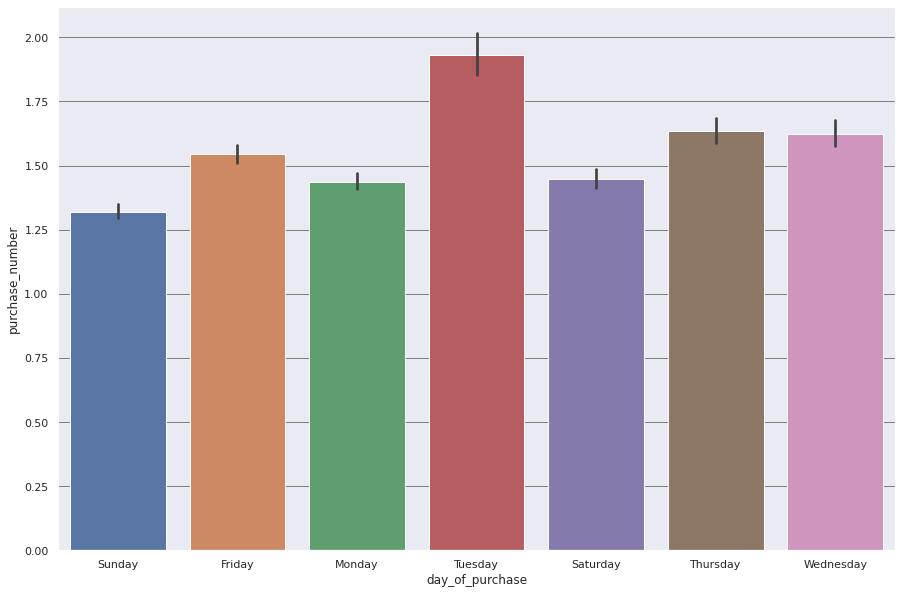

In [85]:
plt.figure(figsize=(15,10))
plt.grid(color='grey')
sns.barplot(data=max_product_number_by_day, x="day_of_purchase", y="purchase_number")

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [32]:
# Объединение в одну таблицу данных о покупателе и времени совершения покупки
approved_customers_orders = customers[['customer_id', 'customer_unique_id']] \
                            .merge(orders[['order_approved_at', 'customer_id']], on='customer_id') \
                            .dropna() \
                            .sort_values('order_approved_at')
approved_customers_orders.head()

,customer_id,customer_unique_id,order_approved_at
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38
17531,b3a9bf200375f53cc5c6991919c356fd,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32
59705,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57
19876,7812fcebfc5e8065d31e1bb5f0017dae,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23
21796,da0ba2a9935bca5b4610b0e3bca9d3b4,88bc832f104b6dd684a17dbb1b76e778,2016-10-04 10:25:46


In [33]:
# Создание столбца со значением месяц и год совершения покупки
approved_customers_orders["year_month"] = approved_customers_orders["order_approved_at"].dt.to_period("M")
approved_customers_orders

,customer_id,customer_unique_id,order_approved_at,year_month
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,2016-09
17531,b3a9bf200375f53cc5c6991919c356fd,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32,2016-10
59705,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57,2016-10
19876,7812fcebfc5e8065d31e1bb5f0017dae,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23,2016-10
21796,da0ba2a9935bca5b4610b0e3bca9d3b4,88bc832f104b6dd684a17dbb1b76e778,2016-10-04 10:25:46,2016-10
...,...,...,...,...
495,6e353700bc7bcdf6ebc15d6de16d7002,7febafa06d9d8f232a900a2937f04338,2018-08-29 14:30:23,2018-08
84603,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,2018-08-29 14:31:07,2018-08
49885,496630b6740bcca28fce9ba50d8a26ef,b701bebbdf478f5500348f03aff62121,2018-08-29 15:05:22,2018-08
67281,898b7fee99c4e42170ab69ba59be0a8b,24ac2b4327e25baf39f2119e4228976a,2018-08-29 15:10:26,2018-08


В таблице видно, что первая и последняя записанные покупки были совершены в середине месяца. Отбросим эти данные для более показательного анализа

In [34]:
# Удаление записей о покупках совершенных в неполных месяцах
approved_customers_orders = approved_customers_orders.query("year_month > '2016-09' & year_month < '2018-09'")

In [35]:
# Подсчёт количества недель в месяце
approved_customers_orders = approved_customers_orders \
                            .assign(weeks_in_month = approved_customers_orders.year_month.dt.days_in_month / 7)
approved_customers_orders.head()

,customer_id,customer_unique_id,order_approved_at,year_month,weeks_in_month
17531,b3a9bf200375f53cc5c6991919c356fd,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32,2016-10,4.428571
59705,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57,2016-10,4.428571
19876,7812fcebfc5e8065d31e1bb5f0017dae,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23,2016-10,4.428571
21796,da0ba2a9935bca5b4610b0e3bca9d3b4,88bc832f104b6dd684a17dbb1b76e778,2016-10-04 10:25:46,2016-10,4.428571
59932,e81a9f176936e3124dfd90c483bf3289,823c47d4abda1f8ce7568145f76c2b85,2016-10-04 10:26:40,2016-10,4.428571


In [36]:
# Подсчёт количества заказов каждого пользователя за каждый месяц 
orders_number_by_week = approved_customers_orders \
                            .groupby(['customer_unique_id', 'year_month', 'weeks_in_month'], as_index=False) \
                            .agg({'customer_id':'count'}) \
                            .rename(columns=({'customer_id':'orders_count'}))
orders_number_by_week.head()

,customer_unique_id,year_month,weeks_in_month,orders_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1


In [37]:
# Подсчёт количества заказов каждого пользователя в неделю
orders_number_by_week = orders_number_by_week \
                        .assign(avg_orders_by_week = orders_number_by_week.orders_count / orders_number_by_week.weeks_in_month)

In [38]:
# Отбор нужных столбцов и сортировка итоговой таблицы
orders_number_by_week = orders_number_by_week[['customer_unique_id', 'year_month', 'avg_orders_by_week']] \
                        .sort_values('year_month')
orders_number_by_week.head()

,customer_unique_id,year_month,avg_orders_by_week
78390,ccafc1c3f270410521c3c6f3b249870f,2016-10,0.225806
95507,f99053da7416fd6d626451cd49e44e0f,2016-10,0.225806
85180,de6150bc32a048990e6cbb6dbd3825bb,2016-10,0.225806
77776,cb1bc069e25d9c59773c85a2e2a46713,2016-10,0.225806
6531,10e89fd8e5c745f81bec101207ba4d7d,2016-10,0.225806


Итоговая таблица показывает, сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Для выявления когорты с самым высоким retention необходимо использовать объединенную таблицу с данными о покупателях и совершенных покупках

In [39]:
# Отбор нужных данных в датафрейм для когортного анализа
cohorts = approved_customers_orders[['customer_unique_id', 'customer_id', 'order_approved_at', 'year_month']] \
            .sort_values('order_approved_at')
cohorts.head()

,customer_unique_id,customer_id,order_approved_at,year_month
17531,14359ea0c7a105749c0a56478825b015,b3a9bf200375f53cc5c6991919c356fd,2016-10-04 09:43:32,2016-10
59705,b8b8726af116a5cfb35b0315ecef9172,70fc57eeae292675927697fe03ad3ff5,2016-10-04 10:18:57,2016-10
19876,87776adb449c551e74c13fc34f036105,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-04 10:19:23,2016-10
21796,88bc832f104b6dd684a17dbb1b76e778,da0ba2a9935bca5b4610b0e3bca9d3b4,2016-10-04 10:25:46,2016-10
59932,823c47d4abda1f8ce7568145f76c2b85,e81a9f176936e3124dfd90c483bf3289,2016-10-04 10:26:40,2016-10


In [40]:
# Создание колонки с датой первой покупки каждого уникального клиента
first_order_dates = cohorts \
                                .groupby('customer_unique_id', as_index=False) \
                                .agg({'order_approved_at':'min'}) \
                                .sort_values('order_approved_at') \
                                .rename(columns={'order_approved_at':'first_order_date'})
first_order_dates.head()

,customer_unique_id,first_order_date
7643,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32
69376,b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57
50847,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23
51316,88bc832f104b6dd684a17dbb1b76e778,2016-10-04 10:25:46
48966,823c47d4abda1f8ce7568145f76c2b85,2016-10-04 10:26:40


In [41]:
# Объединение данных
cohorts = cohorts.merge(first_order_dates, on='customer_unique_id').rename(columns={'year_month':'order_date'})
cohorts.head()

,customer_unique_id,customer_id,order_approved_at,order_date,first_order_date
0,14359ea0c7a105749c0a56478825b015,b3a9bf200375f53cc5c6991919c356fd,2016-10-04 09:43:32,2016-10,2016-10-04 09:43:32
1,b8b8726af116a5cfb35b0315ecef9172,70fc57eeae292675927697fe03ad3ff5,2016-10-04 10:18:57,2016-10,2016-10-04 10:18:57
2,87776adb449c551e74c13fc34f036105,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-04 10:19:23,2016-10,2016-10-04 10:19:23
3,88bc832f104b6dd684a17dbb1b76e778,da0ba2a9935bca5b4610b0e3bca9d3b4,2016-10-04 10:25:46,2016-10,2016-10-04 10:25:46
4,823c47d4abda1f8ce7568145f76c2b85,e81a9f176936e3124dfd90c483bf3289,2016-10-04 10:26:40,2016-10,2016-10-04 10:26:40


In [42]:
# Перевод первой даты покупки в формат месяц-год
cohorts["first_order_date"] = cohorts["first_order_date"].dt.to_period("M")
cohorts.head()

,customer_unique_id,customer_id,order_approved_at,order_date,first_order_date
0,14359ea0c7a105749c0a56478825b015,b3a9bf200375f53cc5c6991919c356fd,2016-10-04 09:43:32,2016-10,2016-10
1,b8b8726af116a5cfb35b0315ecef9172,70fc57eeae292675927697fe03ad3ff5,2016-10-04 10:18:57,2016-10,2016-10
2,87776adb449c551e74c13fc34f036105,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-04 10:19:23,2016-10,2016-10
3,88bc832f104b6dd684a17dbb1b76e778,da0ba2a9935bca5b4610b0e3bca9d3b4,2016-10-04 10:25:46,2016-10,2016-10
4,823c47d4abda1f8ce7568145f76c2b85,e81a9f176936e3124dfd90c483bf3289,2016-10-04 10:26:40,2016-10,2016-10


In [43]:
# Для анализа периода январь-декабрь оставим месяца полного 2017 года
cohorts = cohorts.query("first_order_date >= '2017-01' & first_order_date <= '2017-12'")

In [44]:
# Подсчёт количества покупателей в разбивке по дате первой покупки и дате всех остальных покупок
cohorts = cohorts \
        .groupby(['first_order_date', 'order_date'], as_index=False) \
        .agg({'customer_unique_id':pd.Series.nunique})
cohorts.head()

,first_order_date,order_date,customer_unique_id
0,2017-01,2017-01,726
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [45]:
# Создание колонки с обозначением когортного периода
def cohort_period(cohorts):
    cohorts['cohort_period'] = np.arange(len(cohorts))
    return cohorts

cohorts = cohorts.groupby('first_order_date').apply(cohort_period)
cohorts.head()

,first_order_date,order_date,customer_unique_id,cohort_period
0,2017-01,2017-01,726,0
1,2017-01,2017-02,4,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


In [46]:
# Создание более наглядной сводной таблицы 
cohorts = cohorts \
        .pivot(columns='cohort_period', index = 'first_order_date',values='customer_unique_id')
cohorts

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
first_order_date,,,,,,,,,,,,,,,,,,
2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN
2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,6.0,NaN,NaN,NaN
2017-07,3843.0,20.0,13.0,8.0,13.0,7.0,12.0,4.0,7.0,9.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN
2017-08,4204.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-09,4148.0,27.0,20.0,14.0,18.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Отображение соотношения
cohorts_perc = cohorts.divide(cohorts.iloc[:,0], axis=0).mul(100).round(2)
cohorts_perc

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
first_order_date,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.55,0.28,0.14,0.41,0.14,0.55,0.14,0.14,0.28,0.28,0.83,0.41,0.14,0.14,0.28,0.41,0.14
2017-02,100.0,0.23,0.23,0.17,0.40,0.12,0.23,0.17,0.12,0.23,0.12,0.29,0.17,0.17,0.12,0.06,0.06,0.23
2017-03,100.0,0.49,0.34,0.34,0.34,0.15,0.15,0.30,0.30,0.11,0.38,0.15,0.23,0.11,0.15,0.23,0.08,0.15
2017-04,100.0,0.60,0.22,0.17,0.30,0.26,0.34,0.26,0.34,0.17,0.22,0.09,0.09,0.04,0.09,0.09,0.22,NaN
2017-05,100.0,0.53,0.50,0.39,0.31,0.33,0.42,0.17,0.25,0.31,0.28,0.33,0.19,0.06,0.19,0.25,NaN,NaN
2017-06,100.0,0.48,0.35,0.41,0.25,0.35,0.38,0.22,0.13,0.22,0.32,0.38,0.16,0.13,0.19,NaN,NaN,NaN
2017-07,100.0,0.52,0.34,0.21,0.34,0.18,0.31,0.10,0.18,0.23,0.23,0.31,0.13,0.26,NaN,NaN,NaN,NaN
2017-08,100.0,0.67,0.36,0.26,0.38,0.52,0.26,0.26,0.12,0.17,0.24,0.17,0.12,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.65,0.48,0.34,0.43,0.27,0.22,0.22,0.31,0.17,0.27,0.07,NaN,NaN,NaN,NaN,NaN,NaN


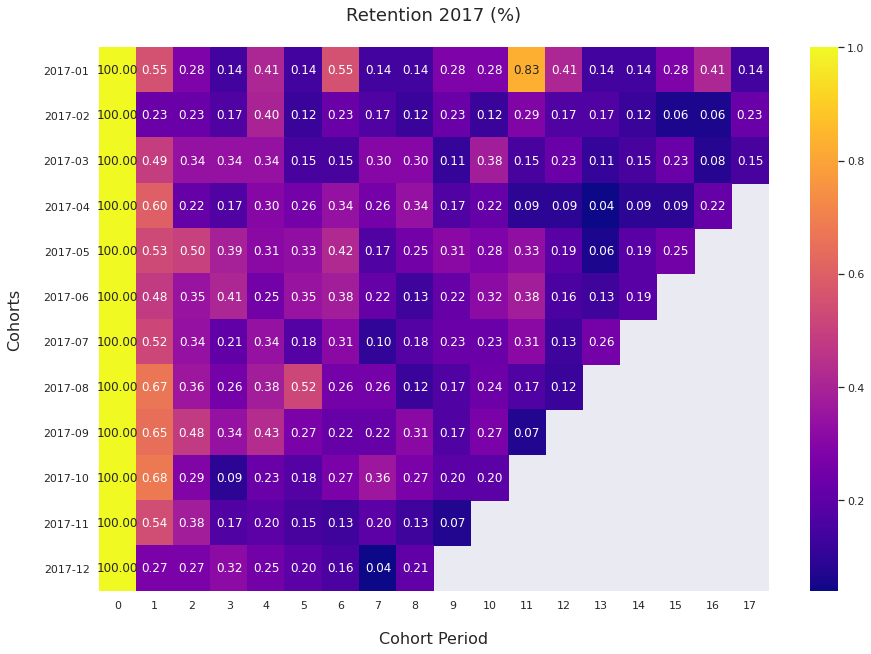

In [86]:
# Визуализация данных
plt.figure(figsize=(15,10))
ax = sns.heatmap(cohorts_perc, vmax=1, annot=True, fmt='.2f', cmap='plasma')
plt.xlabel('\nCohort Period', size= 16)
plt.ylabel('Cohorts\n', size= 16)
plt.title('Retention 2017 (%)\n', size= 18)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

3-й месяц после покупки - это cohort period 3. На графике видно, что максимальное значение cohort period 3 у когорты 2017-06 - 0.41%. Это означает, что на 3-й месяц с момента первой покупки самый высокий процент удержания был у той группы клиентов, которые впервые стали покупателями в июне 2017 года.

## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Для анализа будут использованы все покупки, информация о которых имеется в датафрейме.

In [49]:
all_days = (approved_orders.order_approved_at.max() - approved_orders.order_approved_at.min()).days
print('Представлены данные о покупках приблизительно за', round((all_days / 365)), 'года')

Представлены данные о покупках приблизительно за 2 года


In [50]:
# Объединение всех данных для подсчета метрик в один датафрейм
rfm_df = approved_orders[['order_id', 'customer_id', 'order_approved_at']] \
                .merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left') \
                .merge(order_items[['order_id', 'order_item_id', 'product_id', 'price']], on='order_id', how='left')

In [51]:
rfm_df.head()

,order_id,customer_id,order_approved_at,customer_unique_id,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,1.0,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,1.0,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90


Подсчет показателя **Recency**. В качестве текущей даты возьмем следующий день от последнего дня покупки согласно информации в датафрейме.

In [52]:
# Определение текущей даты, до которой будет рассчитываться время с последней покупки
current_date = rfm_df.order_approved_at.max() + timedelta(1)
current_date

Timestamp('2018-09-04 17:40:06')

In [53]:
# Определение даты последней покупки каждого уникального покупателя
recency = rfm_df \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at':'max'})
recency.head()

,customer_unique_id,order_approved_at
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [54]:
# Создание нового столбца с количеством дней с последней покупки клиента до текущей даты
recency['recency'] = current_date - recency.order_approved_at
recency['recency'] = recency['recency'].dt.days
recency.sort_values('recency').head()

,customer_unique_id,order_approved_at,recency
95658,ff22e30958c13ffe219db7d711e8f564,2018-09-03 17:40:06,1
93028,f80013faf776e37bcea7634d59c2181e,2018-08-29 08:44:13,6
94301,fb7e29c65321441231990afc201c1b14,2018-08-29 03:15:36,6
12781,21dbe8eabd00b34492a939c540e2b1a7,2018-08-29 10:35:16,6
44780,77367b6fbb034ca710d4f41aad009151,2018-08-28 21:25:15,6


Подсчет показателя **Frequency**. Количество покупок определяется как количество уникальных заказов, а не купленных товаров

In [55]:
# Подсчёт количества уникальных заказов на уникального покупателя
frequency = rfm_df \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':pd.Series.nunique}) \
    .rename(columns={'order_id':'frequency'})
frequency.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


Подсчет показателя **Monetary**

In [56]:
# Проверка наличия отрицательных значений в столбце price с целью исключить такие записи в подсчете итоговой суммы
rfm_df[rfm_df.price < 0].count()

order_id              0
customer_id           0
order_approved_at     0
customer_unique_id    0
order_item_id         0
product_id            0
price                 0
dtype: int64

In [57]:
# Подсчёт суммы денег за каждый уникальный заказ
monetary = rfm_df \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'price':'sum'}) \
    .rename(columns={'price':'monetary'})
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [58]:
# Объединение всех трёх метрик в один датафрейм
rfm = recency[['customer_unique_id', 'recency']] \
                .merge(frequency, on='customer_unique_id') \
                .merge(monetary, on='customer_unique_id')
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Подсчёт очков (от 1 до 5) для каждого показателя (R, F, M scores)

In [59]:
# Определение квантилей каждой метрики для разделения их на 4 группы
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75])
quintiles

,recency,frequency,monetary
0.25,120.0,1.0,46.40
0.50,225.0,1.0,89.00
0.75,354.0,1.0,154.17


Квантили для метрики Frequency определились непоказательно, так как большинство покупателей совершили всего одну покупку. Эта особенность данных была замечена при выполнений 1 задания: Из 99281 подтвержденных заказов 93099 покупателей совершили покупку только один раз. 
Необходимо исследовать данные и разделить всех клиентов по метрике frequency вручную

In [60]:
rfm.frequency.quantile([.8, .9, .95, .96, .97, .98, .99, .999, .9999])

0.8000    1.0
0.9000    1.0
0.9500    1.0
0.9600    1.0
0.9700    2.0
0.9800    2.0
0.9900    2.0
0.9990    3.0
0.9999    6.0
Name: frequency, dtype: float64

На основе полученных данных, можно принять решение о разделении клиентов по frequency на группы:
 - совершили 1 покупку (~ 96%)
 - совершили 2 покупки (~ 3%)
 - совершили 3 покупки (~ 0.9%)
 - совершили больше 3-х покупок (< 0.1%)

In [61]:
f_quantiles = rfm.frequency.quantile([.96, .99, .999]).to_frame()
f_quantiles

,frequency
0.960,1.0
0.990,2.0
0.999,3.0


In [62]:
# Создание функции для присвоения рангов каждому покупателю по метрике recency (меньше значение - больше ранг)
def r_score(recency):
    if recency <= quintiles.recency[0.25]:
        return 4
    elif recency <= quintiles.recency[0.5]:
        return 3
    elif recency <= quintiles.recency[0.75]:
        return 2
    else:
        return 1

In [63]:
# Создание функции для присвоения рангов каждому покупателю по метрике frequency (меньше значение - меньше ранг)
def f_score(frequency):
    if frequency == f_quantiles.frequency[0.960]:
        return 1
    elif frequency == f_quantiles.frequency[0.990]:
        return 2
    elif frequency == f_quantiles.frequency[0.999]:
        return 3
    else:
        return 4

In [64]:
# Создание функции для присвоения рангов каждому покупателю по метрике monetary (меньше значение - меньше ранг)
def m_score(monetary):
    if monetary <= quintiles.monetary[0.25]:
        return 1
    elif monetary <= quintiles.monetary[0.5]:
        return 2
    elif monetary <= quintiles.monetary[0.75]:
        return 3
    else:
        return 4

In [65]:
# Создание столбцов с рангами 
rfm['R'] = rfm.recency.apply(r_score)
rfm['F'] = rfm.frequency.apply(f_score)
rfm['M'] = rfm.monetary.apply(m_score)

In [66]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4


In [67]:
# Создание сегментов (RFM-score)
rfm = rfm.assign(RFM = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str))

In [68]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214


In [69]:
unique_segments_number = rfm.RFM.nunique()
print(f'Все клиенты разделились на {unique_segments_number} сегмент по RFM-score')

Все клиенты разделились на 51 сегмент по RFM-score


#### Анализ каждого из 51 сегмента затратный по труду и времени, поэтому необходимо выделить несколько показательных групп. 
Здесь необходимо учесть особенность наших данных в отношении частоты покупок. Тот факт, что >95% всех покупателей совершили покупку только один раз, может говорить о том, что продукт, который реализует компания, имеет долгий срок потребления (~1 покупка за один-два года). К тому же, нам неизвестно, в чем измеряется цена товара, поэтому можно предположить, что данные собраны о продажах крупной техники/электроники или автомобилей (например, у неофициального диллера). <br>
<hr>
Также, можно было бы предположить, что реализуемый товар - это какая-нибудь годовая подписка, но этот вариант придется исключить, так как в данных есть информация о доставках товаров. <br>

Таким образом, кажется логичным следующее разделение клиентов на сегменты:
 - **VIP-клиенты** - покупали относительно часто, на большую сумму и последняя покупка была недавно (R-score 3-4; F-score 3-4; M-score 3-4)
 - **Нельзя потерять** - покупали часто на большую сумму, но давно (R-score 1-2; F-score 3-4; M-score 3-4)
 - **Требующие внимания** - покупали редко на большую сумму, но давно (R-score 1-2; F-score 1-2; M-score 3-4)
 - **Лояльные** - купили дважды, в последний раз - недавно и на большую сумму (R-score 3-4; F-score 2; M-score 3-4)
 - **Потенциально лояльные** - купили однажды недавно и на большую сумму (R-score 3-4; F-score 1; M-score 3-4)
 - **Подающие надежды** - покупали 2-3 раза, последний раз недавно, но на маленькие суммы (R-score 3-4; F-score 2-3; M-score 1-2)
 - **Недавние** - купили недавно и на маленькую сумму (R-score 3-4; F-score 1; M-score 1-2)
 - **Почти уснувшие** - покупали часто, но давно и на маленькие суммы (R-score 1-2; F-score 2-4; M-score 1-2)
 - **Потерянные** - купили однажды давно и на маленькую сумму (R-score 1-2; F-score 1; M-score 1-2)

In [70]:
# Создание столбца с обозначение сегмента, к которому относится клиент
segments = {
    r'[3-4][3-4][3-4]': 'VIP',
    r'[1-2][3-4][3-4]': 'can\'t loose',
    r'[1-2][1-2][3-4]': 'need attention',
    r'[3-4]2[3-4]': 'loyal customers',
    r'[3-4]1[3-4]': 'potential loyalists',
    r'[3-4][2-3][1-2]': 'promising',
    r'[3-4]1[1-2]': 'recent',
    r'[1-2][2-4][1-2]': 'about to sleep',
    '[1-2]1[1-2]': 'lost'
}

rfm['segment'] = rfm['RFM'].replace(segments, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,3,413,potential loyalists
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,recent
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,lost
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,lost
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,need attention


#### Визуализация данных

In [71]:
segment_clients = rfm \
                        .groupby('segment', as_index=False) \
                        .agg({'customer_unique_id':'count'}) \
                        .rename(columns={'customer_unique_id':'customers_count'}) \
                        .sort_values('customers_count')
segment_clients

,segment,customers_count
2,can't loose,80
0,VIP,145
1,about to sleep,250
7,promising,254
4,loyal customers,1225
6,potential loyalists,23043
5,need attention,23471
8,recent,23548
3,lost,23981


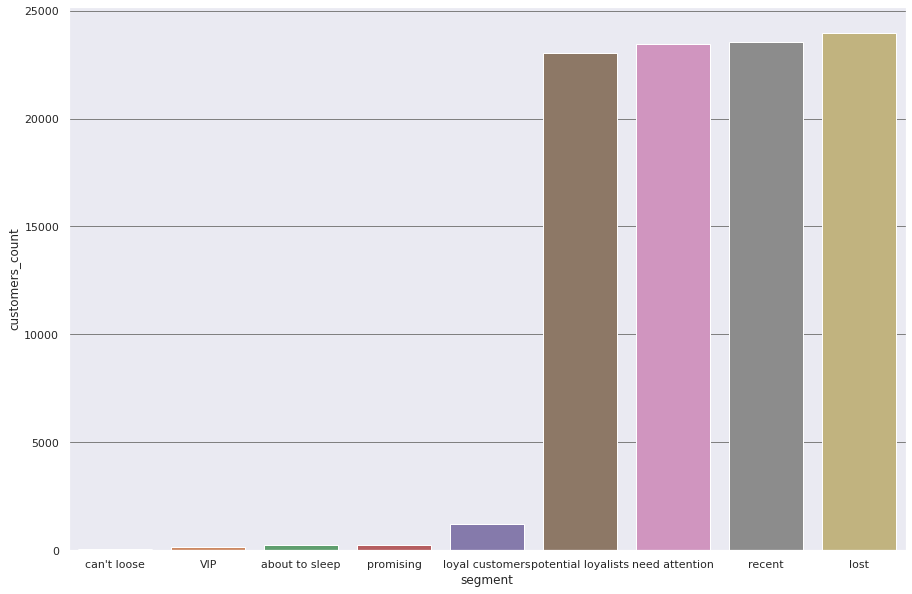

In [82]:
plt.figure(figsize=(15,10))
plt.grid(color='grey')
ax = sns.barplot(data=segment_clients, x='segment', y='customers_count')